In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
import os
from keras.preprocessing import sequence
from keras.models import Sequential

from keras.layers import Dense, Embedding

from keras.models import model_from_json
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [4]:
PATH = "H:\Data Science and Analytics\Hackathons\Siemens - Make it Real\Speech-Emotion-Analyzer"

mylist= os.listdir(PATH+'\RawData')

## Plotting the audio file's waveform and its spectrogram

In [5]:
data, sampling_rate = librosa.load(os.path.join(PATH, "RawData", "03-01-01-01-01-02-06.wav"))

Populating the interactive namespace from numpy and matplotlib


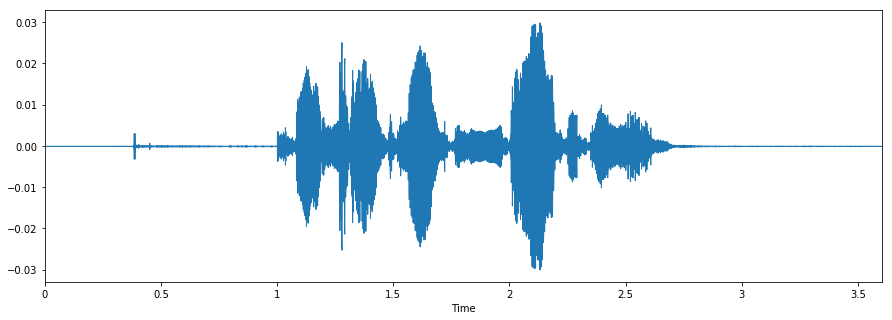

In [6]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

## Setting the labels

In [7]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')

In [8]:
labels = pd.DataFrame(feeling_list)

## Getting the features of audio files using librosa

In [9]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('RawData/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [10]:
df[:5]

,feature
0,"[-70.2677641610773, -70.2677641610773, -70.267..."
1,"[-65.70765240065282, -65.70765240065282, -63.1..."
2,"[-65.4824988827423, -65.4824988827423, -65.482..."
3,"[-64.52844910346735, -64.52844910346735, -64.5..."
4,"[-62.36431052745468, -59.93472513811134, -61.8..."


In [12]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [13]:
newdf = pd.concat([df3,labels], axis=1)

In [14]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [15]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,...,-57.447461,-58.896493,-58.751002,-57.405669,-60.078475,-63.426811,-62.638537,-61.082741,-60.234652,male_calm
1,-65.707652,-65.707652,-63.114722,-61.518999,-61.097138,-63.424602,-63.720067,-56.854608,-55.168972,-54.640002,...,-39.792147,-40.613166,-41.209201,-41.439204,-43.994282,-49.399616,-50.591601,-49.144064,-48.705645,female_calm
2,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,...,-31.346553,-34.310774,-35.800705,-35.936112,-37.631846,-40.119408,-41.662903,-41.323644,-40.710780,male_calm
3,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-65.928222,...,-48.674306,-48.596082,-47.602751,-43.049195,-42.659546,-43.188561,-44.001237,-43.610100,-44.698259,female_calm
4,-62.364311,-59.934725,-61.869600,-67.495764,-71.071811,-65.679826,-63.394396,-65.503349,-61.856639,-60.005421,...,-39.071328,-41.897121,-40.865430,-38.290605,-36.372397,-37.915779,-40.026125,-43.383777,-43.965398,male_calm


In [16]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
558,-57.983965,-58.129757,-57.216111,-57.138616,-58.032113,-57.584437,-57.990391,-57.497483,-57.414894,-58.088535,...,-39.392082,-40.890291,-42.336407,-43.509533,-42.348652,-42.181487,-45.076798,-45.154829,-39.698874,male_sad
52,-63.509118,-63.633813,-63.504395,-63.299428,-63.838960,-65.177300,-66.479497,-65.160203,-65.833741,-64.724393,...,-40.389947,-36.990450,-38.102470,-40.782663,-40.174314,-40.962998,-43.929966,-43.562015,-41.383231,male_calm
60,-57.304340,-57.513506,-57.424149,-60.285886,-63.514341,-59.822909,-59.655570,-60.264965,-60.922122,-63.632326,...,-66.580161,-65.908506,-65.687954,-59.147327,-57.582897,-60.386011,-62.520436,-63.540304,-65.164728,male_calm
663,-52.731972,-52.731972,-52.731972,-52.752181,-53.205017,-53.342686,-53.324966,-52.674901,-53.033251,-53.095465,...,-30.264269,-33.084889,-34.377355,-33.943921,-30.076903,-31.443640,-32.603566,-37.606955,-45.258449,female_angry
283,-65.935606,-65.935606,-65.935606,-65.935606,-65.935606,-65.935606,-65.935606,-65.935606,-65.935606,-65.935606,...,-63.968357,-62.205670,-63.053774,-63.764809,-62.634020,-63.911225,-64.807913,-62.783637,-63.491862,female_happy
251,-59.302074,-57.921034,-56.350581,-55.091018,-55.141024,-57.164170,-56.691381,-56.262418,-56.741344,-58.291611,...,-51.536456,-52.609392,-52.365218,-54.648005,-54.653464,-52.204383,-53.474689,-54.675860,-56.525341,female_happy
450,-52.467828,-52.434426,-52.994212,-56.030900,-57.397291,-56.777386,-57.501751,-60.653666,-61.020051,-61.583051,...,-60.937047,-64.153058,-64.399757,-64.369917,-63.819492,-62.376262,-60.856836,-61.253310,-61.436559,male_sad
178,-59.718661,-56.618457,-56.024146,-54.136815,-51.594680,-50.985795,-51.575866,-51.605743,-53.443795,-56.355305,...,-34.105487,-36.778505,-38.304620,-41.325724,-43.021275,-44.300558,-45.745592,-47.605434,-46.841593,male_calm
631,-50.773067,-51.290537,-49.537144,-49.165073,-49.960850,-49.895120,-50.056533,-47.998513,-49.212078,-51.043201,...,-51.971631,-51.041481,-49.913501,-51.230732,-52.506655,-50.665369,-49.479515,-50.153623,-50.676300,female_angry
398,-36.811277,-39.613813,-47.779596,-47.867839,-48.520848,-49.263317,-50.615703,-50.911183,-50.581487,-52.066911,...,-49.006235,-49.691547,-50.794710,-51.054776,-53.019162,-48.176630,-47.039419,-49.845285,-50.194023,male_sad


In [17]:
rnewdf=rnewdf.fillna(0)

## Dividing the data into test and train

In [18]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [19]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
847,-51.902578,-52.353978,-52.741080,-51.768636,-52.477552,-51.622514,-51.330892,-51.660000,-50.603078,-51.142691,...,-46.703506,-45.953838,-47.489543,-48.091935,-48.895603,-49.874182,-49.468175,-46.761618,-46.996806,female_fearful
861,-58.343683,-57.758329,-57.390002,-57.915742,-57.707931,-56.975302,-56.616314,-54.947653,-55.302234,-54.532491,...,-54.269604,-56.536836,-57.594930,-55.862270,-53.719479,-52.433263,-53.052404,-54.593557,-55.809253,female_fearful
284,-58.416270,-58.416270,-58.416270,-57.573445,-57.402440,-58.283530,-59.001954,-55.797078,-58.000678,-56.934552,...,-35.375331,-36.822361,-40.088500,-37.593660,-38.732343,-40.107168,-41.780195,-41.634849,-42.437048,male_happy
900,-47.560947,-48.092271,-48.728114,-49.372154,-50.501240,-51.668273,-51.371920,-51.136957,-51.782069,-51.782069,...,-51.499885,-51.476879,-51.782069,-51.782069,-51.782069,-51.323238,-50.613737,-50.840188,-50.942781,male_fearful
301,-48.091555,-48.091555,-48.091555,-48.091555,-48.091555,-48.091555,-48.091555,-48.091555,-48.091555,-48.091555,...,-48.091555,-48.091555,-48.091555,-48.091555,-48.091555,-48.091555,-48.091555,-48.091555,-48.091555,female_happy
388,-65.012178,-62.332253,-65.145349,-74.183069,-77.810991,-77.903472,-78.839155,-77.973899,-69.871600,-62.527525,...,-62.252049,-65.876857,-67.579137,-61.824149,-62.076845,-65.980927,-67.948471,-71.522563,-76.508507,male_sad
895,-44.614816,-44.014504,-43.963923,-44.872705,-44.159845,-43.476006,-44.777185,-44.895047,-43.643869,-44.021198,...,-40.643650,-41.052240,-40.560014,-41.751428,-41.309452,-42.248567,-43.151118,-42.181382,-42.301795,female_fearful
471,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,...,-59.519984,-59.306837,-58.755400,-59.799858,-58.920172,-60.878159,-62.100041,-60.260030,-59.630258,female_sad
546,-51.184228,-50.666917,-51.630926,-51.646032,-52.121620,-52.546795,-52.472924,-52.978508,-52.645649,-50.576076,...,-53.822245,-52.425517,-52.587618,-53.503582,-52.757409,-52.616040,-54.575232,-53.020236,-50.155550,male_sad
952,-33.836645,-33.483259,-32.777422,-33.720400,-33.560630,-32.265330,-34.218872,-34.635536,-32.317135,-32.178820,...,-41.730200,-41.561805,-40.342609,-39.866161,-39.367023,-39.435226,-39.430968,-39.294906,-38.841820,male_fearful


In [20]:
trainfeatures = train.iloc[:, :-1]

In [21]:
trainlabel = train.iloc[:, -1:]

In [22]:
testfeatures = test.iloc[:, :-1]

In [23]:
testlabel = test.iloc[:, -1:]

In [24]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
X_train.shape

(758, 216)

## Changing dimension for CNN model

In [26]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [27]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
# model.add(Conv1D(128, 5,padding='same',))
# model.add(Activation('relu'))
# model.add(Conv1D(128, 5,padding='same',))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation(tf.nn.softmax))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)           82048     
__________

In [29]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [30]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=550, validation_data=(x_testcnn, y_test))

Train on 758 samples, validate on 202 samples
Epoch 1/700
758/758 [==============================] - 7s 9ms/step - loss: 2.6207 - acc: 0.0712 - val_loss: 2.3373 - val_acc: 0.0396
Epoch 2/700
758/758 [==============================] - 6s 8ms/step - loss: 2.2952 - acc: 0.1042 - val_loss: 2.2891 - val_acc: 0.0842
Epoch 3/700
758/758 [==============================] - 6s 8ms/step - loss: 2.2532 - acc: 0.1530 - val_loss: 2.2736 - val_acc: 0.0842
Epoch 4/700
758/758 [==============================] - 7s 9ms/step - loss: 2.2134 - acc: 0.1636 - val_loss: 2.2305 - val_acc: 0.1287
Epoch 5/700
758/758 [==============================] - 6s 8ms/step - loss: 2.1861 - acc: 0.2032 - val_loss: 2.2335 - val_acc: 0.1337
Epoch 6/700
758/758 [==============================] - 8s 10ms/step - loss: 2.1628 - acc: 0.2005 - val_loss: 2.2098 - val_acc: 0.1832
Epoch 7/700
758/758 [==============================] - 8s 11ms/step - loss: 2.1398 - acc: 0.2309 - val_loss: 2.2007 - val_acc: 0.1584
Epoch 8/700
758/758 [

Epoch 62/700
758/758 [==============================] - 8s 10ms/step - loss: 1.4498 - acc: 0.4631 - val_loss: 1.7731 - val_acc: 0.3366
Epoch 63/700
758/758 [==============================] - 8s 10ms/step - loss: 1.4482 - acc: 0.4617 - val_loss: 1.7749 - val_acc: 0.3168
Epoch 64/700
758/758 [==============================] - 8s 10ms/step - loss: 1.4309 - acc: 0.4723 - val_loss: 1.8230 - val_acc: 0.2822
Epoch 65/700
758/758 [==============================] - 7s 9ms/step - loss: 1.4296 - acc: 0.4868 - val_loss: 1.7740 - val_acc: 0.3564
Epoch 66/700
758/758 [==============================] - 7s 9ms/step - loss: 1.4259 - acc: 0.4670 - val_loss: 1.7373 - val_acc: 0.3416
Epoch 67/700
758/758 [==============================] - 8s 10ms/step - loss: 1.4055 - acc: 0.4723 - val_loss: 1.8169 - val_acc: 0.3069
Epoch 68/700
758/758 [==============================] - 7s 9ms/step - loss: 1.4032 - acc: 0.4776 - val_loss: 1.8158 - val_acc: 0.3168
Epoch 69/700
758/758 [==============================] - 7s

Epoch 123/700
758/758 [==============================] - 7s 9ms/step - loss: 1.1739 - acc: 0.5646 - val_loss: 1.6593 - val_acc: 0.3515
Epoch 124/700
758/758 [==============================] - 6s 8ms/step - loss: 1.1729 - acc: 0.5660 - val_loss: 1.6971 - val_acc: 0.3614
Epoch 125/700
758/758 [==============================] - 7s 9ms/step - loss: 1.1730 - acc: 0.5778 - val_loss: 1.6767 - val_acc: 0.3663
Epoch 126/700
758/758 [==============================] - 7s 9ms/step - loss: 1.1614 - acc: 0.5554 - val_loss: 1.7015 - val_acc: 0.3812
Epoch 127/700
758/758 [==============================] - 7s 9ms/step - loss: 1.1590 - acc: 0.5712 - val_loss: 1.7004 - val_acc: 0.3861
Epoch 128/700
758/758 [==============================] - 6s 9ms/step - loss: 1.1496 - acc: 0.5660 - val_loss: 1.7090 - val_acc: 0.3812
Epoch 129/700
758/758 [==============================] - 6s 8ms/step - loss: 1.1642 - acc: 0.5660 - val_loss: 1.6659 - val_acc: 0.3861
Epoch 130/700
758/758 [==============================] 

758/758 [==============================] - 6s 8ms/step - loss: 1.0250 - acc: 0.6306 - val_loss: 1.6259 - val_acc: 0.4208
Epoch 184/700
758/758 [==============================] - 6s 8ms/step - loss: 1.0181 - acc: 0.6332 - val_loss: 1.6295 - val_acc: 0.4158
Epoch 185/700
758/758 [==============================] - 7s 10ms/step - loss: 1.0149 - acc: 0.6293 - val_loss: 1.6408 - val_acc: 0.4059
Epoch 186/700
758/758 [==============================] - 7s 9ms/step - loss: 1.0135 - acc: 0.6187 - val_loss: 1.6178 - val_acc: 0.4208
Epoch 187/700
758/758 [==============================] - 7s 10ms/step - loss: 1.0169 - acc: 0.6227 - val_loss: 1.6224 - val_acc: 0.4109
Epoch 188/700
758/758 [==============================] - 6s 8ms/step - loss: 0.9915 - acc: 0.6372 - val_loss: 1.8242 - val_acc: 0.3713
Epoch 189/700
758/758 [==============================] - 7s 9ms/step - loss: 1.0163 - acc: 0.6135 - val_loss: 1.6239 - val_acc: 0.4307
Epoch 190/700
758/758 [==============================] - 6s 8ms/ste

Epoch 244/700
758/758 [==============================] - 6s 8ms/step - loss: 0.8883 - acc: 0.6939 - val_loss: 1.6446 - val_acc: 0.4059
Epoch 245/700
758/758 [==============================] - 6s 8ms/step - loss: 0.8796 - acc: 0.6926 - val_loss: 1.6191 - val_acc: 0.4257
Epoch 246/700
758/758 [==============================] - 7s 9ms/step - loss: 0.8844 - acc: 0.6926 - val_loss: 1.6346 - val_acc: 0.4208
Epoch 247/700
758/758 [==============================] - 6s 8ms/step - loss: 0.8873 - acc: 0.6821 - val_loss: 1.6654 - val_acc: 0.3614
Epoch 248/700
758/758 [==============================] - 6s 9ms/step - loss: 0.8843 - acc: 0.6939 - val_loss: 1.6074 - val_acc: 0.4455
Epoch 249/700
758/758 [==============================] - 6s 8ms/step - loss: 0.8835 - acc: 0.6755 - val_loss: 1.6493 - val_acc: 0.4356
Epoch 250/700
758/758 [==============================] - 6s 8ms/step - loss: 0.8740 - acc: 0.7150 - val_loss: 1.6978 - val_acc: 0.4257
Epoch 251/700
758/758 [==============================] 

758/758 [==============================] - 6s 7ms/step - loss: 0.7612 - acc: 0.7361 - val_loss: 1.6748 - val_acc: 0.4307
Epoch 305/700
758/758 [==============================] - 6s 7ms/step - loss: 0.7625 - acc: 0.7375 - val_loss: 1.6785 - val_acc: 0.4406
Epoch 306/700
758/758 [==============================] - 6s 7ms/step - loss: 0.7565 - acc: 0.7348 - val_loss: 1.6564 - val_acc: 0.4653
Epoch 307/700
758/758 [==============================] - 6s 8ms/step - loss: 0.7522 - acc: 0.7296 - val_loss: 1.6343 - val_acc: 0.4158
Epoch 308/700
758/758 [==============================] - 6s 7ms/step - loss: 0.7498 - acc: 0.7348 - val_loss: 1.6809 - val_acc: 0.4257
Epoch 309/700
758/758 [==============================] - 6s 8ms/step - loss: 0.7523 - acc: 0.7441 - val_loss: 1.6360 - val_acc: 0.4406
Epoch 310/700
758/758 [==============================] - 6s 8ms/step - loss: 0.7493 - acc: 0.7520 - val_loss: 1.7358 - val_acc: 0.4059
Epoch 311/700
758/758 [==============================] - 6s 7ms/step 

Epoch 365/700
758/758 [==============================] - 6s 7ms/step - loss: 0.6375 - acc: 0.7982 - val_loss: 1.7558 - val_acc: 0.4356
Epoch 366/700
758/758 [==============================] - 6s 7ms/step - loss: 0.6359 - acc: 0.8047 - val_loss: 1.7020 - val_acc: 0.4257
Epoch 367/700
758/758 [==============================] - 6s 7ms/step - loss: 0.6334 - acc: 0.8100 - val_loss: 1.7888 - val_acc: 0.4307
Epoch 368/700
758/758 [==============================] - 6s 7ms/step - loss: 0.6335 - acc: 0.8021 - val_loss: 1.6914 - val_acc: 0.4307
Epoch 369/700
758/758 [==============================] - 6s 7ms/step - loss: 0.6317 - acc: 0.8021 - val_loss: 1.6990 - val_acc: 0.4257
Epoch 370/700
758/758 [==============================] - 6s 8ms/step - loss: 0.6234 - acc: 0.8087 - val_loss: 1.7218 - val_acc: 0.4257
Epoch 371/700
758/758 [==============================] - 6s 7ms/step - loss: 0.6156 - acc: 0.7995 - val_loss: 1.7933 - val_acc: 0.4257
Epoch 372/700
758/758 [==============================] 

758/758 [==============================] - 6s 7ms/step - loss: 0.5180 - acc: 0.8483 - val_loss: 1.8171 - val_acc: 0.4406
Epoch 426/700
758/758 [==============================] - 5s 7ms/step - loss: 0.5052 - acc: 0.8536 - val_loss: 1.7197 - val_acc: 0.4406
Epoch 427/700
758/758 [==============================] - 5s 7ms/step - loss: 0.5078 - acc: 0.8522 - val_loss: 1.8091 - val_acc: 0.4307
Epoch 428/700
758/758 [==============================] - 5s 7ms/step - loss: 0.5020 - acc: 0.8628 - val_loss: 1.7819 - val_acc: 0.4307
Epoch 429/700
758/758 [==============================] - 5s 7ms/step - loss: 0.5160 - acc: 0.8351 - val_loss: 1.7640 - val_acc: 0.4406
Epoch 430/700
758/758 [==============================] - 6s 7ms/step - loss: 0.5069 - acc: 0.8417 - val_loss: 1.7446 - val_acc: 0.4307
Epoch 431/700
758/758 [==============================] - 5s 7ms/step - loss: 0.5014 - acc: 0.8549 - val_loss: 1.7331 - val_acc: 0.4257
Epoch 432/700
758/758 [==============================] - 5s 7ms/step 

Epoch 486/700
758/758 [==============================] - 5s 7ms/step - loss: 0.4089 - acc: 0.8799 - val_loss: 1.8639 - val_acc: 0.4307
Epoch 487/700
758/758 [==============================] - 6s 7ms/step - loss: 0.3979 - acc: 0.8905 - val_loss: 1.8852 - val_acc: 0.4059
Epoch 488/700
758/758 [==============================] - 6s 7ms/step - loss: 0.3954 - acc: 0.9024 - val_loss: 1.7891 - val_acc: 0.4455
Epoch 489/700
758/758 [==============================] - 6s 7ms/step - loss: 0.4024 - acc: 0.8918 - val_loss: 1.9660 - val_acc: 0.4356
Epoch 490/700
758/758 [==============================] - 5s 7ms/step - loss: 0.3955 - acc: 0.8931 - val_loss: 1.8127 - val_acc: 0.4356
Epoch 491/700
758/758 [==============================] - 6s 7ms/step - loss: 0.3952 - acc: 0.8945 - val_loss: 1.9360 - val_acc: 0.4356
Epoch 492/700
758/758 [==============================] - 5s 7ms/step - loss: 0.3850 - acc: 0.9103 - val_loss: 1.8264 - val_acc: 0.4307
Epoch 493/700
758/758 [==============================] 

758/758 [==============================] - 6s 8ms/step - loss: 0.2938 - acc: 0.9354 - val_loss: 2.0347 - val_acc: 0.4158
Epoch 547/700
758/758 [==============================] - 6s 8ms/step - loss: 0.2944 - acc: 0.9340 - val_loss: 1.9702 - val_acc: 0.4307
Epoch 548/700
758/758 [==============================] - 6s 7ms/step - loss: 0.2958 - acc: 0.9327 - val_loss: 1.9503 - val_acc: 0.4406
Epoch 549/700
758/758 [==============================] - 6s 8ms/step - loss: 0.2950 - acc: 0.9354 - val_loss: 1.9530 - val_acc: 0.4356
Epoch 550/700
758/758 [==============================] - 6s 8ms/step - loss: 0.2884 - acc: 0.9446 - val_loss: 2.0840 - val_acc: 0.4257
Epoch 551/700
758/758 [==============================] - 6s 8ms/step - loss: 0.2911 - acc: 0.9380 - val_loss: 1.9370 - val_acc: 0.4307
Epoch 552/700
758/758 [==============================] - 6s 8ms/step - loss: 0.2953 - acc: 0.9327 - val_loss: 1.9730 - val_acc: 0.4307
Epoch 553/700
758/758 [==============================] - 6s 8ms/step 

Epoch 607/700
758/758 [==============================] - 6s 7ms/step - loss: 0.2058 - acc: 0.9644 - val_loss: 2.0670 - val_acc: 0.4406
Epoch 608/700
758/758 [==============================] - 6s 7ms/step - loss: 0.1991 - acc: 0.9657 - val_loss: 2.1863 - val_acc: 0.4455
Epoch 609/700
758/758 [==============================] - 6s 7ms/step - loss: 0.2000 - acc: 0.9591 - val_loss: 2.0846 - val_acc: 0.4505
Epoch 610/700
758/758 [==============================] - 6s 8ms/step - loss: 0.2004 - acc: 0.9710 - val_loss: 2.0355 - val_acc: 0.4406
Epoch 611/700
758/758 [==============================] - 6s 8ms/step - loss: 0.2044 - acc: 0.9565 - val_loss: 2.2459 - val_acc: 0.4307
Epoch 612/700
758/758 [==============================] - 6s 7ms/step - loss: 0.2039 - acc: 0.9657 - val_loss: 2.1313 - val_acc: 0.4554
Epoch 613/700
758/758 [==============================] - 6s 8ms/step - loss: 0.2006 - acc: 0.9644 - val_loss: 2.2224 - val_acc: 0.4257
Epoch 614/700
758/758 [==============================] 

758/758 [==============================] - 6s 8ms/step - loss: 0.1316 - acc: 0.9802 - val_loss: 2.3161 - val_acc: 0.4356
Epoch 668/700
758/758 [==============================] - 6s 8ms/step - loss: 0.1313 - acc: 0.9815 - val_loss: 2.2981 - val_acc: 0.4455
Epoch 669/700
758/758 [==============================] - 6s 7ms/step - loss: 0.1257 - acc: 0.9842 - val_loss: 2.3305 - val_acc: 0.4455
Epoch 670/700
758/758 [==============================] - 6s 8ms/step - loss: 0.1225 - acc: 0.9894 - val_loss: 2.3225 - val_acc: 0.4406
Epoch 671/700
758/758 [==============================] - 6s 7ms/step - loss: 0.1305 - acc: 0.9868 - val_loss: 2.3900 - val_acc: 0.4406
Epoch 672/700
758/758 [==============================] - 6s 7ms/step - loss: 0.1193 - acc: 0.9868 - val_loss: 2.2881 - val_acc: 0.4505
Epoch 673/700
758/758 [==============================] - 6s 7ms/step - loss: 0.1286 - acc: 0.9828 - val_loss: 2.3300 - val_acc: 0.4356
Epoch 674/700
758/758 [==============================] - 6s 7ms/step 

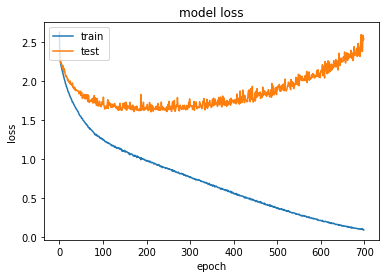

In [31]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [32]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write( model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


## Loading the model

In [33]:
# loading json and creating model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 47.52%


## Predicting emotions on the test data

In [34]:
preds = model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

202/202 [==============================] - 1s 3ms/step


In [35]:
preds1=preds.argmax(axis=1)

In [36]:
preds1

array([2, 8, 1, 7, 7, 2, 8, 4, 2, 5, 2, 1, 8, 2, 8, 3, 8, 8, 5, 7, 9, 2,
       8, 9, 0, 0, 2, 2, 6, 7, 2, 2, 7, 7, 8, 3, 0, 0, 2, 0, 7, 2, 3, 2,
       5, 2, 4, 1, 5, 5, 5, 0, 7, 0, 7, 3, 8, 6, 8, 8, 9, 6, 8, 8, 6, 5,
       4, 7, 5, 2, 2, 3, 6, 2, 9, 8, 9, 7, 6, 7, 7, 2, 2, 7, 3, 4, 0, 3,
       7, 8, 9, 1, 8, 3, 5, 3, 6, 6, 1, 8, 3, 2, 5, 4, 1, 5, 4, 4, 1, 3,
       3, 0, 5, 8, 3, 2, 6, 6, 8, 8, 3, 8, 5, 0, 5, 2, 0, 6, 3, 5, 1, 1,
       2, 1, 2, 1, 8, 6, 9, 8, 5, 7, 6, 7, 9, 1, 1, 1, 8, 4, 9, 9, 6, 7,
       8, 0, 9, 2, 0, 1, 0, 9, 2, 2, 7, 2, 2, 9, 9, 2, 3, 3, 2, 4, 3, 1,
       2, 8, 6, 3, 6, 1, 2, 8, 0, 6, 5, 1, 8, 2, 5, 9, 2, 1, 2, 9, 1, 6,
       2, 2, 2, 8], dtype=int64)

In [37]:
abc = preds1.astype(int).flatten()

In [38]:
predictions = (lb.inverse_transform((abc)))

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,female_fearful
1,male_happy
2,female_calm
3,male_fearful
4,male_fearful
5,female_fearful
6,male_happy
7,female_sad
8,female_fearful
9,male_angry


In [40]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [41]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,female_fearful
1,male_calm
2,female_sad
3,male_fearful
4,male_happy
5,female_happy
6,male_happy
7,female_calm
8,female_sad
9,male_angry


In [42]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [43]:
finaldf[170:180]

,actualvalues,predictedvalues
170,female_angry,female_happy
171,female_happy,female_happy
172,female_fearful,female_fearful
173,male_sad,female_sad
174,male_sad,female_happy
175,female_calm,female_calm
176,female_sad,female_fearful
177,male_sad,male_happy
178,male_sad,male_calm
179,female_sad,female_happy


In [44]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,27
female_calm,14
female_fearful,16
female_happy,23
female_sad,20
male_angry,20
male_calm,15
male_fearful,23
male_happy,24


In [45]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,15
female_calm,20
female_fearful,39
female_happy,19
female_sad,9
male_angry,18
male_calm,18
male_fearful,19
male_happy,29


In [46]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

In [75]:
data, sampling_rate = librosa.load('test_output.wav')

Populating the interactive namespace from numpy and matplotlib


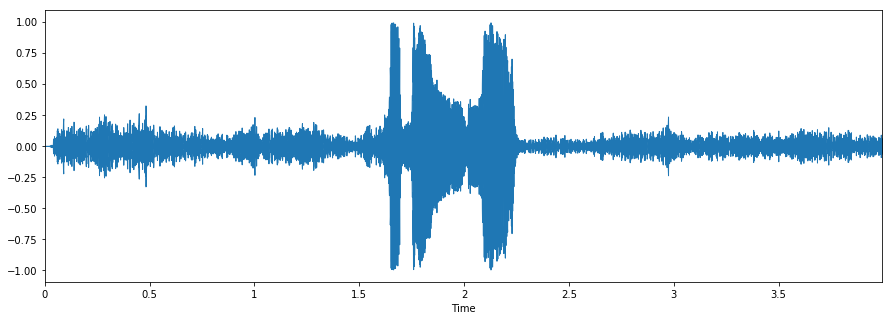

In [76]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [77]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('test_output.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-6.521218,-5.665041,-8.112067,-8.913132,-10.797769,-10.385433,-11.377328,-10.470228,-11.533652,-13.356353,...,-10.641206,-10.82819,-13.547778,-13.210284,-10.974164,-12.067129,-12.953488,-14.806818,-12.55139,-9.518585


In [78]:
twodim= np.expand_dims(livedf2, axis=2)
livepreds = model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)
livepreds

1/1 [==============================] - 0s 6ms/step


array([[1.4972073e-01, 8.9531906e-12, 2.5646020e-02, 1.3703204e-06,
        3.7207240e-08, 8.2443684e-01, 2.0441250e-06, 1.9138992e-04,
        3.4276542e-07, 1.2732997e-06]], dtype=float32)

In [79]:
livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['male_angry'], dtype=object)